# Proposal: Predicting the Effect of Lifestyle Factors on the Income of American Citizens # 
## By Daniel Kouchakkhani, Faye McBride, Katherine Dai, & Lillian Milroy ##

### Adult Data Set Analysis ###

#### Introduction ####

In 1994, the average yearly income of an American citizen was $33,178 (U.S. Bureau of the Census, 1996). There are many factors that determine this income — racism, sexism, and ableism are just a few examples of oppression that unfairly lower the wage of marginalized people. Other factors include a person’s level of education and a person’s marital or relationship status. 

Barry Becker extracted data from a 1994 U.S. census that allows one to compare various factors of a person and whether their yearly income is above or below $50 000, he called this data set the Adult Data Set. This data set was limited to observations that occur more than once in the census with an age older than 16, and an adjusted gross income and hours worked greater than one. 

The Adult Data Set contains the following variables;
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* finalweight: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holland-Netherlands.
* yearly_income: <=50K, >50K.

The Adult Data Set offers numerous predictors to determine the yearly income of an American citizen. We are curious about which one has the most influence. Thus, we will be answering the question “Which variable determines with the most accuracy whether a person’s yearly income is greater than or less than $50 000?”

#### Exploratory Data Analysis ####

We started by reading in the data and exploring relevant summary statistics. We then took steps to make it human-readable, and tidy enough for further analysis.

In [1]:
install.packages("data.validator")
install.packages("mltools")
install.packages("data.table")
install.packages("caret")
install.packages("fastDummies")
install.packages("janitor")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(janitor)
library(data.validator)
library(repr)
library(tidymodels)
library(mltools)
library(data.table)
library(caret)
library(fastDummies)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attachi

In [2]:
# Read in the dataset
income_data <- read_csv("https://raw.githubusercontent.com/Daniel040506/dsci-100-project-template/main/adult.data", col_names = FALSE)
head(income_data, 3)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
glimpse(income_data)

Rows: 32,561
Columns: 15
$ X1  <dbl> 39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, 30, 23, 32, 40, 34, 25…
$ X2  <chr> "State-gov", "Self-emp-not-inc", "Private", "Private", "Private", …
$ X3  <dbl> 77516, 83311, 215646, 234721, 338409, 284582, 160187, 209642, 4578…
$ X4  <chr> "Bachelors", "Bachelors", "HS-grad", "11th", "Bachelors", "Masters…
$ X5  <dbl> 13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, 13, 12, 11, 4, 9, 9, 7…
$ X6  <chr> "Never-married", "Married-civ-spouse", "Divorced", "Married-civ-sp…
$ X7  <chr> "Adm-clerical", "Exec-managerial", "Handlers-cleaners", "Handlers-…
$ X8  <chr> "Not-in-family", "Husband", "Not-in-family", "Husband", "Wife", "W…
$ X9  <chr> "White", "White", "White", "Black", "Black", "White", "Black", "Wh…
$ X10 <chr> "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Mal…
$ X11 <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ X12 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ X13 <dbl> 40,

In [4]:
# find data dimensions
data_dimensions <- dim(income_data)
data_dimensions

[1] 32561    15

In [5]:
# Rename the columns
colnames(income_data) <- c("age","work_class","final_weight","education","num_years_education","marital_status","occupation","relationship",
                         "race","sex","capital_gain","capital_loss","hours_per_week","native_country","income_above_50K")

In [6]:
# Explore data summary
summary(income_data)

      age         work_class         final_weight      education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 num_years_education marital_status      occupation        relationship      
 Min.   : 1.00       Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00       Class :character   Class :character   Class :character  
 Median :10.00       Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                               
 3rd Qu.:12.00                                                               
 Max.   :16.00       

In [7]:
# Replace unknown values with NA
income_data[income_data == "?"] <- "NA"

In [8]:
# How many missing values are there in the dataset?
sum(is.na(income_data))

[1] 0

In [9]:
# change income_above_50K column to binary

income_data["income_above_50K"][income_data["income_above_50K"] == ">50K"] <- "0"
income_data["income_above_50K"][income_data["income_above_50K"] == "<=50K"] <- "1"
income_data$income_above_50K <- as.numeric(as.character(income_data$income_above_50K))

head(income_data, 10)

age,work_class,final_weight,education,num_years_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_above_50K
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0


In [10]:
# find the class of each variable
lapply(income_data, class)

$age
[1] "numeric"

$work_class
[1] "character"

$final_weight
[1] "numeric"

$education
[1] "character"

$num_years_education
[1] "numeric"

$marital_status
[1] "character"

$occupation
[1] "character"

$relationship
[1] "character"

$race
[1] "character"

$sex
[1] "character"

$capital_gain
[1] "numeric"

$capital_loss
[1] "numeric"

$hours_per_week
[1] "numeric"

$native_country
[1] "character"

$income_above_50K
[1] "numeric"

In [11]:
# Get rid of empty data/missing values
income_data_clean <- income_data |>
    remove_empty(whic=c("rows")) |>
    remove_empty(whic=c("cols"))
head(income_data_clean, 3)

age,work_class,final_weight,education,num_years_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_above_50K
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1


We created tables with count and  frequency data for each catrgorical variable, and then used these tables to make graphs. We hoped this would help us determine which categorical variables are suitable for further analysis. 

In [12]:
# create vectors of categorical data

work_class_vector <- income_data$work_class
education_vector <- income_data$education
marital_status_vector <- income_data$marital_status
occupation_vector <- income_data$occupation
relationship_vector <- income_data$relationship
race_vector <- income_data$race
sex_vector <- income_data$sex
native_country_vector <- income_data$native_country
income_above_50K_vector <- income_data$income_above_50K

work_class_vector,Freq
<fct>,<int>
Federal-gov,960
Local-gov,2093
NA,1836
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


[1] 9

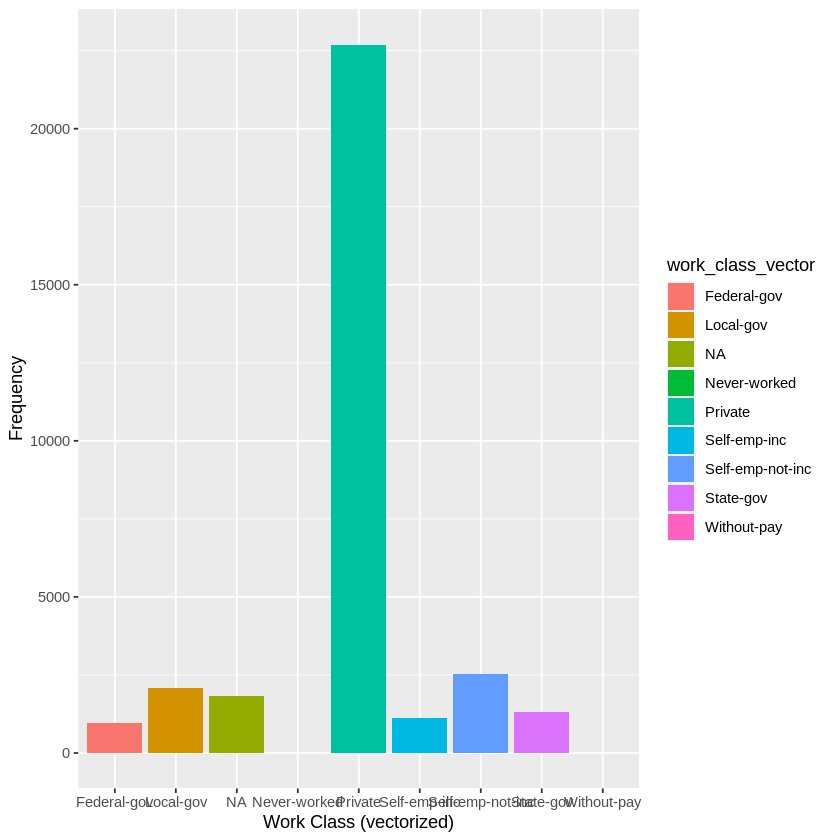

In [13]:
# Work_class

work_class_count <- as.data.frame(table(work_class_vector))
work_class_count
nrow(work_class_count)

work_class_graph <- ggplot(work_class_count, aes(x = work_class_vector, y = Freq, fill = work_class_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "Work Class (vectorized)", y = "Frequency")
work_class_graph

education_vector,Freq
<fct>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


[1] 16

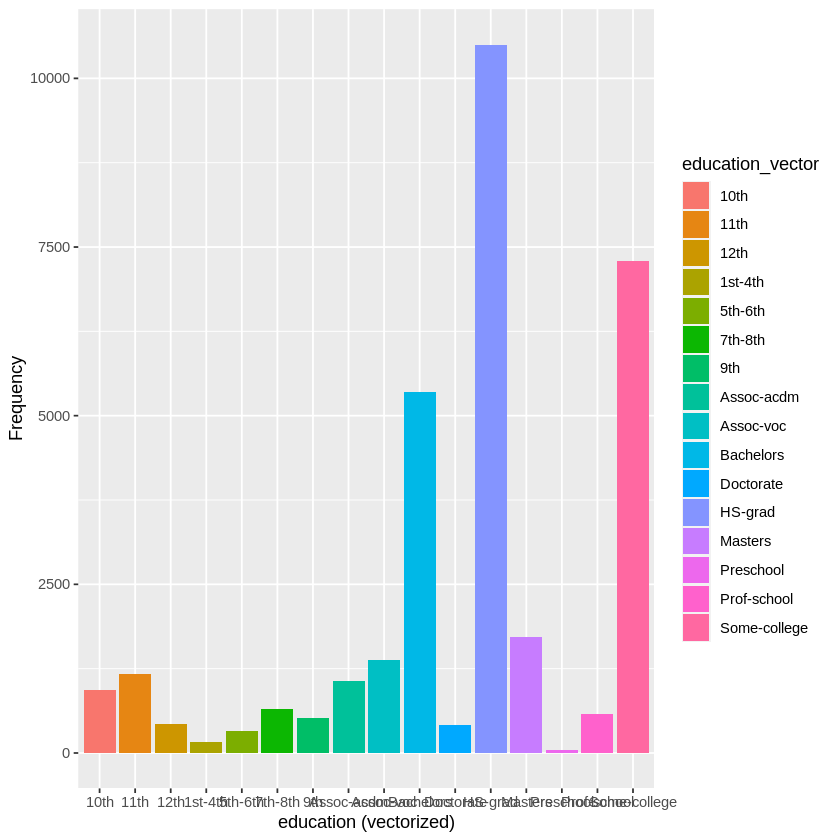

In [14]:
# Education

education_count <- as.data.frame(table(education_vector))
education_count
nrow(education_count)

education_graph <- ggplot(education_count, aes(x = education_vector, y = Freq, fill = education_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "education (vectorized)", y = "Frequency")
education_graph

marital_status_vector,Freq
<fct>,<int>
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10683
Separated,1025
Widowed,993


[1] 7

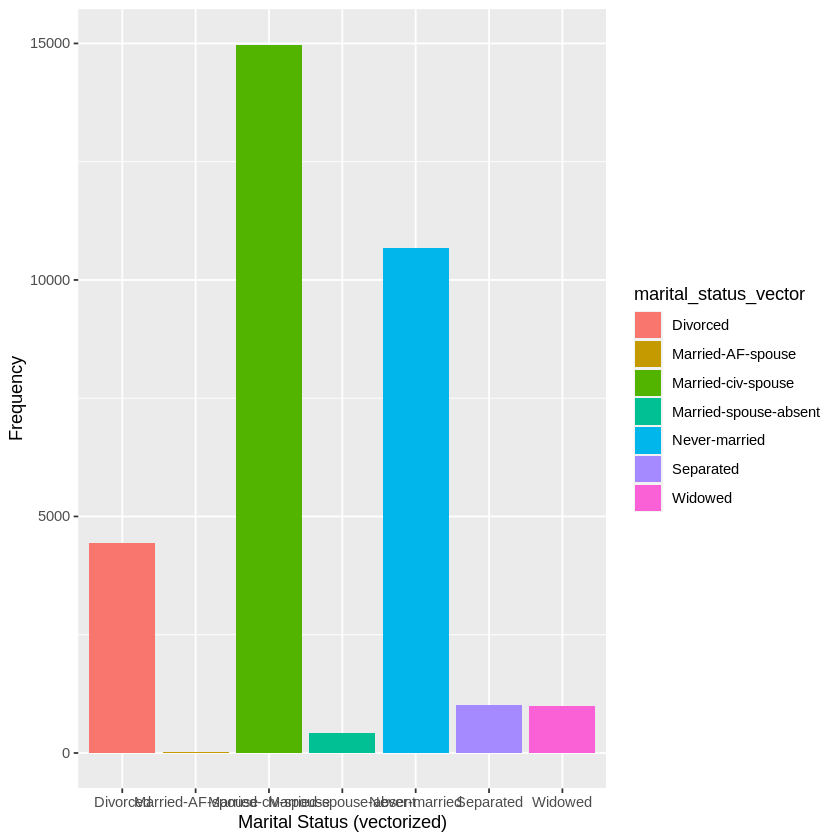

In [15]:
# Marital_status

marital_status_count <- as.data.frame(table(marital_status_vector))
marital_status_count
nrow(marital_status_count)

marital_status_graph <- ggplot(marital_status_count, aes(x = marital_status_vector, y = Freq, fill = marital_status_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "Marital Status (vectorized)", y = "Frequency")
marital_status_graph

In [16]:
# occupation
income_data |>
    group_by(occupation) |>
    summarise(n = n()) |>
    mutate(Freq = n/sum(n))

occupation,n,Freq
<chr>,<int>,<dbl>
Adm-clerical,3770,0.1157826848
Armed-Forces,9,0.0002764043
Craft-repair,4099,0.1258867971
Exec-managerial,4066,0.1248733147
Farming-fishing,994,0.0305273180
Handlers-cleaners,1370,0.0420748749
Machine-op-inspct,2002,0.0614845981
NA,1843,0.0566014557
Other-service,3295,0.1011946808


relationship_vector,Freq
<fct>,<int>
Husband,13193
Not-in-family,8305
Other-relative,981
Own-child,5068
Unmarried,3446
Wife,1568


[1] 6

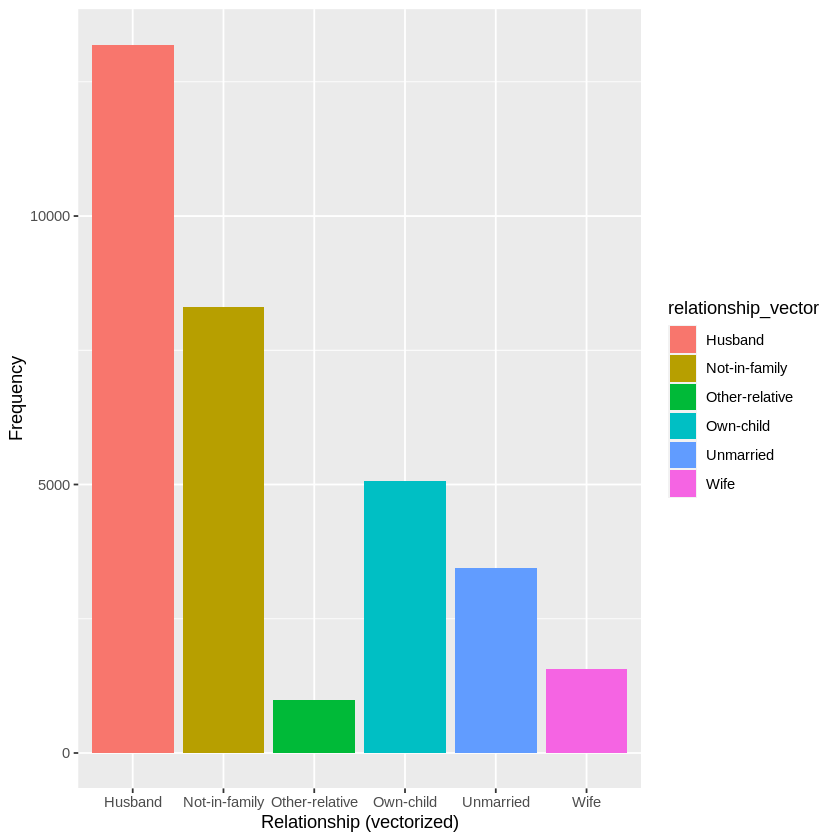

In [17]:
# relationship

relationship_count <- as.data.frame(table(relationship_vector))
relationship_count
nrow(relationship_count)

relationship_graph <- ggplot(relationship_count, aes(x = relationship_vector, y = Freq, fill = relationship_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "Relationship (vectorized)", y = "Frequency")
relationship_graph

race_vector,Freq
<fct>,<int>
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1039
Black,3124
Other,271
White,27816


[1] 5

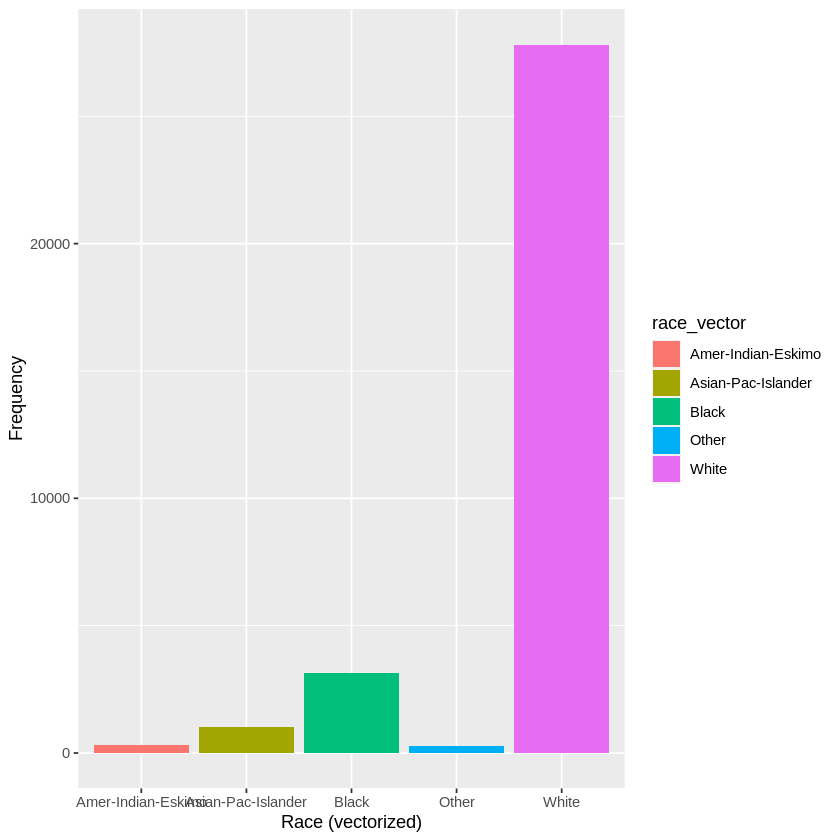

In [18]:
# race

race_count <- as.data.frame(table(race_vector))
race_count
nrow(race_count)

race_graph <- ggplot(race_count, aes(x = race_vector, y = Freq, fill = race_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "Race (vectorized)", y = "Frequency")
race_graph

sex_vector,Freq
<fct>,<int>
Female,10771
Male,21790


[1] 2

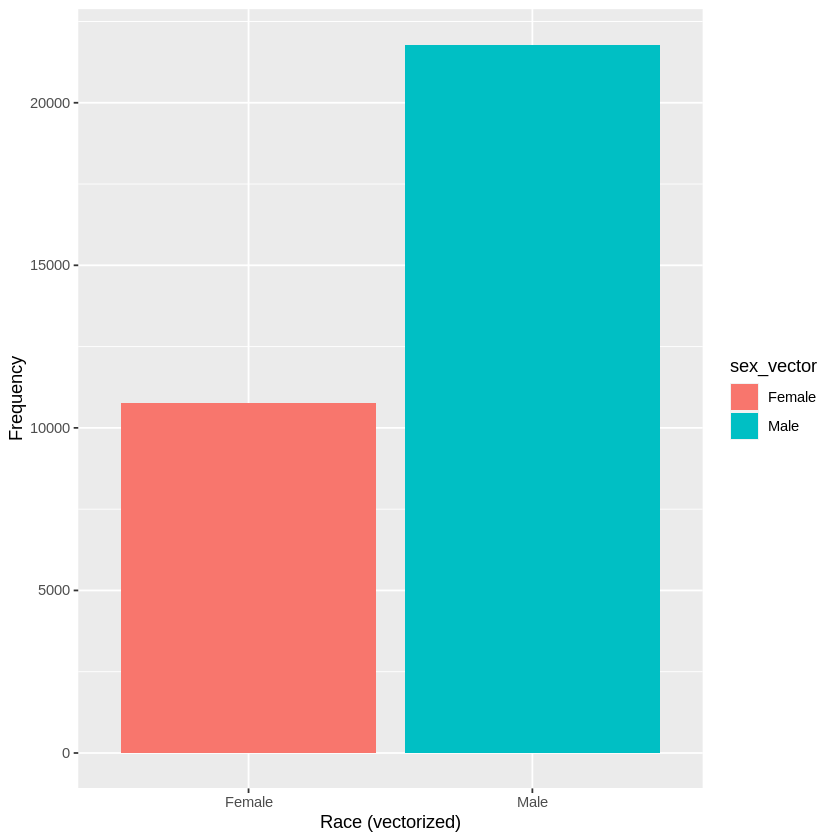

In [19]:
# sex

sex_count <- as.data.frame(table(sex_vector))
sex_count
nrow(sex_count)

sex_graph <- ggplot(sex_count, aes(x = sex_vector, y = Freq, fill = sex_vector)) +
    geom_bar(stat = "identity") +
    labs(x = "Race (vectorized)", y = "Frequency")
sex_graph

In [20]:
# native_country

income_data |>
    group_by(native_country) |>
    summarise(n = n()) |>
    mutate(Freq = n/sum(n))

# We will not be creating a graph for native_country, because there are so many possible values that it would not be a good representation of the data.

native_country,n,Freq
<chr>,<int>,<dbl>
Cambodia,19,5.835202e-04
Canada,121,3.716102e-03
China,75,2.303369e-03
Columbia,59,1.811984e-03
Cuba,95,2.917601e-03
Dominican-Republic,70,2.149811e-03
Ecuador,28,8.599244e-04
El-Salvador,106,3.255428e-03
England,90,2.764043e-03


#### Methods ####
We decided to use a forward selection model to inform our ultimate feature selection. In order to reduce the likelihood of errors occurring, we also decided to eliminate several variables as contenders at this point based on our analyses thus far before proceeding with forward selection.

We observed that native_country, education, work_class, and occupation are polychotomous variables with many possible values. The scope of our analysis is too broad to include variables that require so much additional processing, so they were eliminated from consideration.

The variables marital_status and relationship tell us the same information. marital_status has one more possible value than relationship, so we decided to keep relationship and eliminate marital_status.

capital_gain and capital_loss are not metrics that align meaningfully with our research goals - we are more interested in exploring how income is related to lifestyle factors as opposed to fluctuation of income based on the sale of property and assets, so wel will not include them in the forward selection model.

We have included the code we plan to use for our forward selection model below - it is still being debugged, but we intend to use the accuracy results to select our predictor variables.

Once we have perfected the forward selection model, we will use the results stored in accuracies to help us choose the best combination of predictors for our response variable, income_above_50K. We will use the tabyl function to further examine the most accurate relationships the model indicates before deciding. Once we know what predictor(s) we are using, we will make a subset of the original income_data dataframe which includes the relevant data, and split it into training and testing sets.

We will then use the training and test data to help us build and train a KNN classifier to predict the behaviour of our response variable. We plan to use a scatterplot to help visualize the classifier, and a cross-validation plot to represent the accuracy of the model.

In [21]:
# forward selection
# subset potential predictors

income_subset <- income_data_clean |>
    select(income_above_50K,
           age,
           num_years_education,
           relationship,
           work_class,
           race,
           sex)
income_subset <- as.data.frame(table(income_subset))
head(income_subset, 3)
possible_predictors <- colnames(income_subset |> select(-income_above_50K))
possible_predictors                               

,income_above_50K,age,num_years_education,relationship,work_class,race,sex,Freq
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,0,17,1,Husband,Federal-gov,Amer-Indian-Eskimo,Female,0
2,1,17,1,Husband,Federal-gov,Amer-Indian-Eskimo,Female,0
3,0,18,1,Husband,Federal-gov,Amer-Indian-Eskimo,Female,0


[1] "age"                 "num_years_education" "relationship"       
[4] "work_class"          "race"                "sex"                
[7] "Freq"

In [ ]:
# Creat dummy variables for categorical variables
dummy_income_data <- dummy_columns(income_subset, select_columns = c('age', 'num_years_education', 'relationship', 'work_class', 'race', 'sex'))

In [ ]:
# Make an empty tibble called accuracies to store results in
accuracies <- tibble(size = integer(), model_string = character(), accuracy = numeric())
accuracies

In [ ]:
# Create a formula for the model that will be applied to the predictors

formula <- paste("income_above_50K", "~", paste(possible_predictors, collapse="+"))
formula

In [ ]:
# Model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [ ]:
income_data_clean <- income_data_clean %>%
    mutate(income_above_50K = as.factor(income_above_50K))

head(income_data_clean)


# Create object for 5-fold cross-validation
income_vfold <- vfold_cv(income_data_clean, v = 5, strata = income_above_50K)

In [ ]:
# Store the total number of predictors
n_total <- length(possible_predictors)

# Create a vector to store the selected predictors in
selected <- c()

ks <- tibble(neighbors = seq(from = 1, to = 2, by = 1))

In [ ]:
# Make an empty tibble called accuracies to store results in
accuracies <- tibble(size = integer(), model_string = character(), accuracy = numeric())

all_models <- list()

# Create a for loop to iterate through all of the predictors
for (i in 1:n_total) {  
    #accs <- list()
    #models <- list()
    for (j in 1:length(possible_predictors)) {  
        new_preds <- c(selected, possible_predictors[[j]])
        model_string <- paste("income_above_50K", "~", paste(new_preds, collapse="+"))
         print(model_string)
        # Recipe for model string   
        income_recipe <- recipe(as.formula(model_string), data = income_data_clean) |>
                            step_scale(all_numeric_predictors()) |>
                            step_center(all_numeric_predictors()) |>
                            step_dummy(all_nominal_predictors())
        
        # tune classifier with predictors and find accuracy for best K
        acc <- workflow() |>
            add_recipe(income_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = income_vfold, grid = ks) |>
            collect_metrics() |>
            filter(.metric == "accuracy") %>%
        mutate(model_string = model_string)
    
        # Use the dataframe made earlier to store the result
        accs[[j]] <- acc
        models[[j]] <- model_string
        all_models[[j]] <- acc
        print(accs)
        
        if (j == 2){break}
    }
    #jstar <- which.max(unlist(accs))
    #accuracies <- accuracies |>
    #    add_row(size = i,
    #            model_string = models[[jstar]],
    #            accuracy = accs[[jstar]])
    #selected <- c(selected, possible_predictors[[jstar]])
    #possible_predictors <- possible_predictors[-jstar]
    break
}
all_models

In [ ]:
model_string

In [ ]:
library(readr)

In [ ]:
saveRDS(all_models, './model_results.RDS')

In [ ]:
sadf <- readRDS("model_results.RDS")
sadf

In [ ]:
bind_rows(sadf)

In [ ]:
show_notes(.Last.tune.result)

#### Expected Outcomes and Significance ####

We expect that of the variables we are considering as predictors at this point, num_years_education and age will have the most influence on whether someone earns more than or less than $50 000 per year. These findings would stress the importance of ensuring education and various occupation types are accessible to everyone and could inspire change. For instance, universities could lower tuition to make education accessible to people from various financial backgrounds. Further studies could analyze the variables that determine the education or occupation someone can receive. This would pinpoint focal areas in making education and various occupation types more accessible. 


#### References ####

U.S. Bureau of the Census, Current Population Reports, P60-193, Money Income in the United States: 1995 (With Separate Data on Valuation of Noncash Benefits), U.S. Government Printing Office, Washington, DC, 1996.

"Data Science: A First Introduction". T. Timbers, T. Campbell, & M. Lee. Chapter 6.8.2, "Finding a good subset of predictors"; Chapter 6.8.3,  "Forward selection in R". 2022.